<a href="https://colab.research.google.com/github/sifta/DemoNotebooks/blob/master/Mandelbrot_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mandlebrot Set Notebook

This notebook makes plots of the Mandelbrot Set, which is bulbous shaped with lots of spines.  The there are four cell commands below.  To run the code, select 'run all' under the runtime menu.  You can also mouse over the brackets \[ \] and click the play button when it appears to replay a cell.   

1. The first cell is hidden, and has the code that runs the simulation math.  Run this first.

2. In the second block, you can change the size of the picture by adjusting the numbers of 'figsize.'  You can also change the colors by changing the value of cmap.  You can try some of the following: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', and the following website documents a lot more: https://matplotlib.org/tutorials/colors/colormaps.html

3. The third block, you can compute a zoomed in picture of the set.  The values in zoomx are the beginning and end of the x-axis, and the values of zoomy are the beginning and end of the y-axis.  You can change those and press play to recompute.

4. The fourth block, does the visualization of the zoomed in content from the 2nd block.  This way, you can adjust how it looks without redoing the calculation over and over again.


In [0]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max=80, some_threshold=2, nx=601, ny=401, xrange=[-2,1], yrange=[-1.5,1.5]):
    # A grid of c-values
    x = np.linspace(xrange[0], xrange[1], nx)
    y = np.linspace(yrange[0], yrange[1], ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration
    z = c
    mandelbrot_set = 0.0 * abs(z) 
    for j in range(N_max):
        z = z**2 + c
        mandelbrot_set += 0.1 * (abs(z) > some_threshold) 

    return np.maximum(N_max - mandelbrot_set, 0)


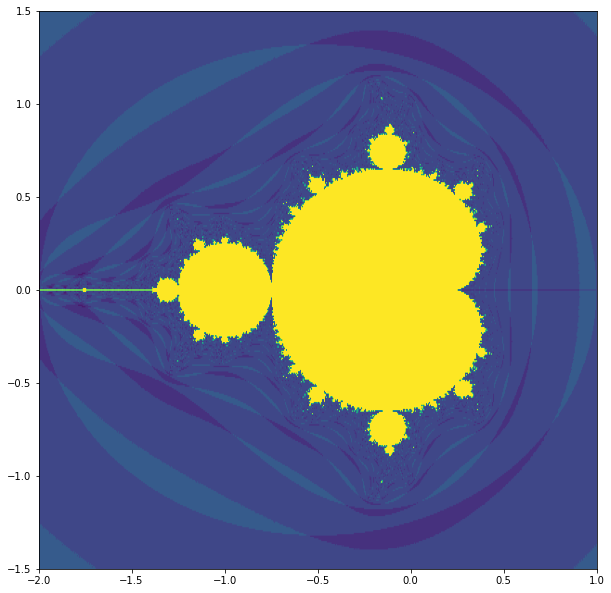

In [6]:
%%capture --no-display
# Plot the whole set
mandelbrot_set = compute_mandelbrot()
plt.figure(figsize=(10,12))
plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5], cmap='viridis')
plt.show()

In [0]:
%%capture --no-display
zoomx = [-0.2,-0.19]
zoomy = [0.665,0.675]
zoomin = compute_mandelbrot(85, 2., 1001, 1001, xrange=zoomx, yrange=[-zoomy[1],-zoomy[0]])

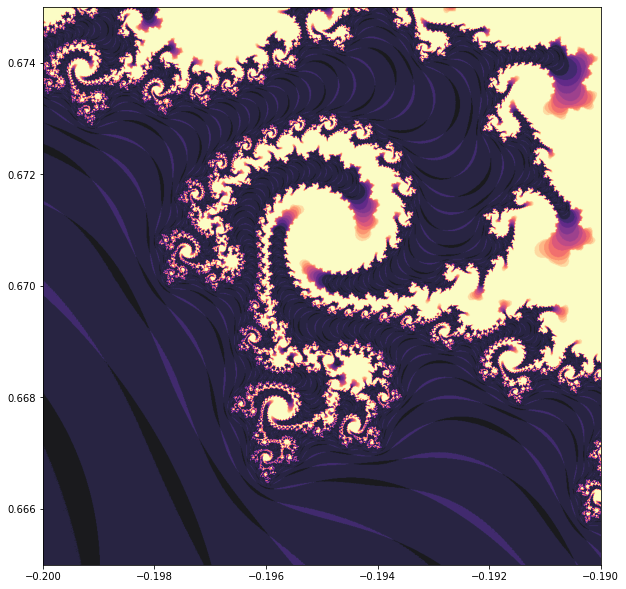

In [4]:
plt.figure(figsize=(10,12))
plt.imshow(zoomin.T, extent=[zoomx[0],zoomx[1],zoomy[0],zoomy[1]], cmap='magma', alpha=0.9)
plt.show()